In [46]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20, 6
import scipy.io as sio
from scipy import fft, arange, signal


from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.tsa.statespace.tools import diff

In [47]:
df1 = pd.read_csv('android_low.csv')

In [48]:
df2 = pd.read_csv('h.264+mp3_TS.csv')

In [49]:
#df1['Jitter'].plot(marker='8')

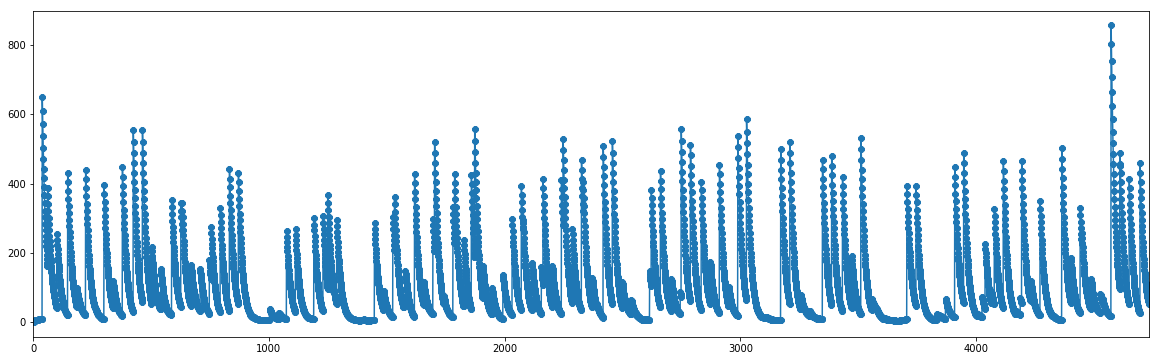

In [51]:
df2['Jitter'].plot(marker='8')
#plot the data

In [52]:
#convert to numpy array
#temp = np.array([x for x in df1['Jitter']])

In [57]:
#temp.size

In [58]:
#we remove the mean of the signal to create a signal oscillating around 0
##temp_n = temp - np.mean(temp)

In [59]:
# create timestamp that start with 1, #
#t = arange(len(temp)) + 1

In [60]:
# let's plot the data
'''plt.plot(t, temp_n)
plt.xlabel('Time')
plt.ylabel('Jitter')
'''

"plt.plot(t, temp_n)\nplt.xlabel('Time')\nplt.ylabel('Jitter')\n"

In [29]:
#from statsmodels import api as sm

In [31]:
# get the autocorrelation coefficient
#acf_df1 = sm.tsa.acf(temp_n, nlags=len(temp_n))

In [61]:
'''lag_df1 = arange(len(temp_n))
plt.plot(lag_df1, acf_df1)
plt.xlim((0, 1200))
plt.xlabel('Lags')
plt.ylabel('Autocorrelation')
'''

"lag_df1 = arange(len(temp_n))\nplt.plot(lag_df1, acf_df1)\nplt.xlim((0, 1200))\nplt.xlabel('Lags')\nplt.ylabel('Autocorrelation')\n"

Text(0, 0.5, 'Jitter')

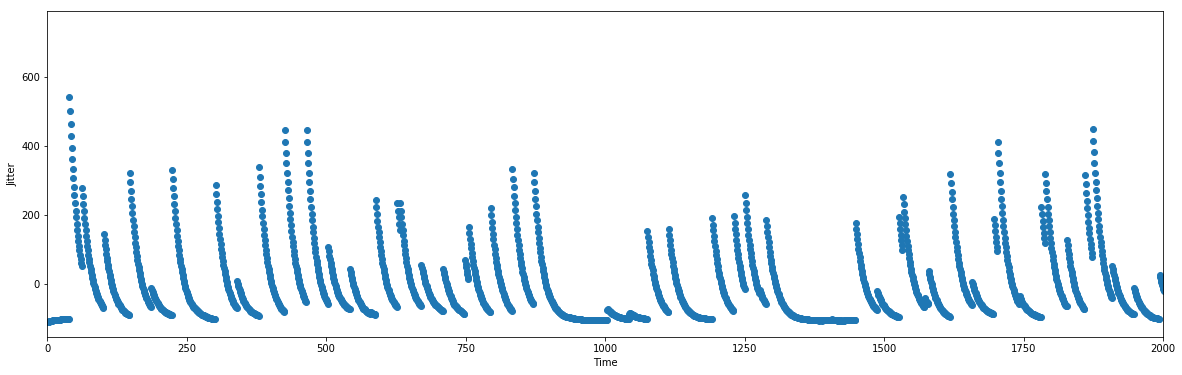

In [62]:
#df2
temp_df2 = np.array([x for x in df2['Jitter']])

temp_df2_n = temp_df2 - np.mean(temp_df2)

t1 = arange(len(temp_df2_n)) + 1

# let's plot the data
plt.plot(t1, temp_df2_n,'o')
plt.xlim(0,2000)
plt.xlabel('Time')
plt.ylabel('Jitter')

Text(0, 0.5, 'Autocorrelation')

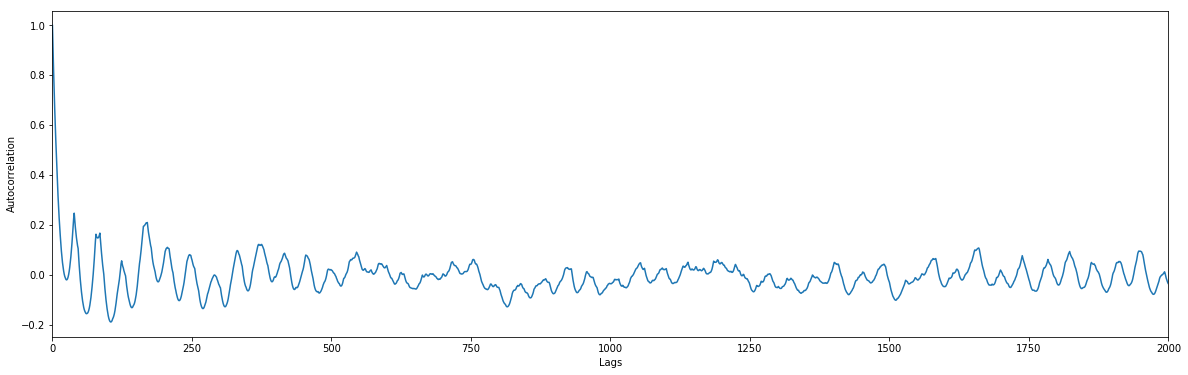

In [36]:
# get the autocorrelation coefficient
acf_df2 = sm.tsa.acf(temp_df2_n, nlags=len(temp_df2_n))

lag_df2 = arange(len(temp_df2_n))
plt.plot(lag_df2, acf_df2)
plt.xlim((0, 2000))
plt.xlabel('Lags')
plt.ylabel('Autocorrelation')

In [76]:
# find all the peaks that associated with the positive peaks
peaks_positive, _ = signal.find_peaks(acf_df2, height=0.0, threshold=None)

Text(0, 0.5, 'Autocorrelation')

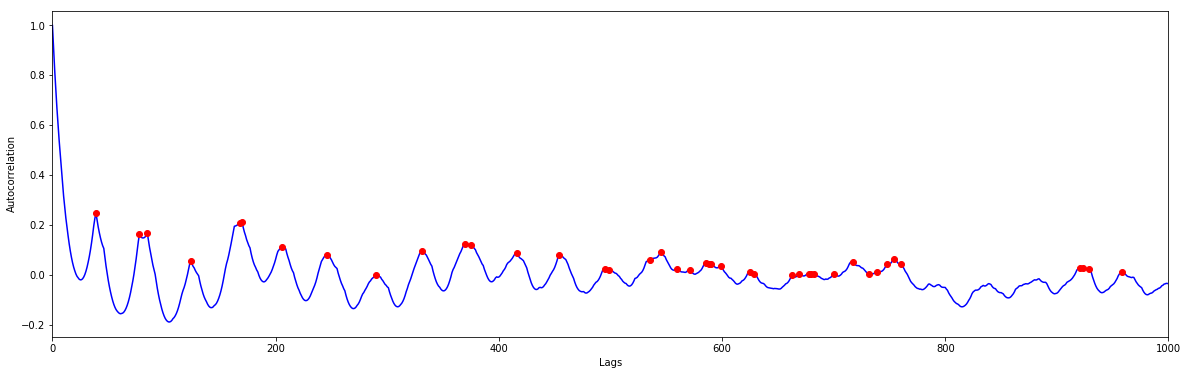

In [78]:
plt.plot(lag_df2, acf_df2, 'b-')

plt.plot(lag_df2[peaks_positive], acf_df2[peaks_positive], 'ro')
plt.xlim((0, 1000))
plt.xlabel('Lags')
plt.ylabel('Autocorrelation')

In [50]:
#actual data

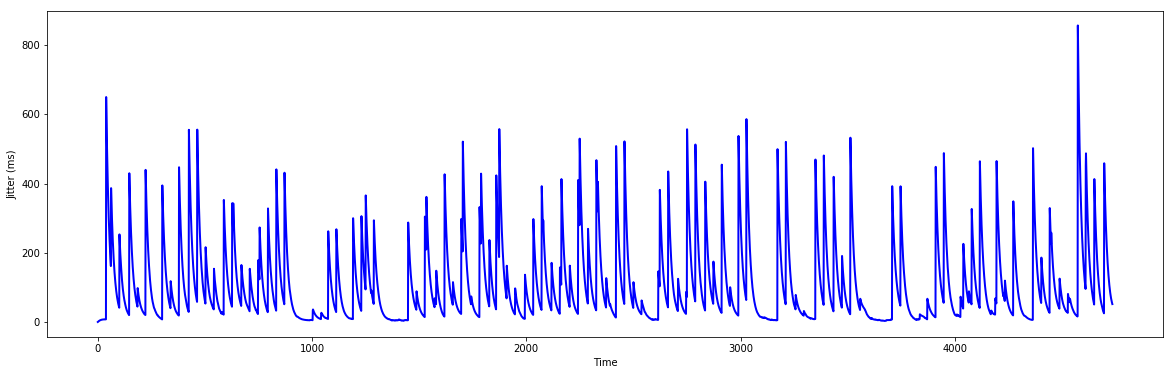

In [51]:
plt.plot(df2.Time, df2.Jitter, 'b-', linewidth = 2)
plt.xlabel('Time')
plt.ylabel('Jitter (ms)')
plt.show()

In [52]:
# find all the peaks that associated with the positive peaks
peaks_ , _ = signal.find_peaks(df2.Jitter, threshold = None, distance=None)

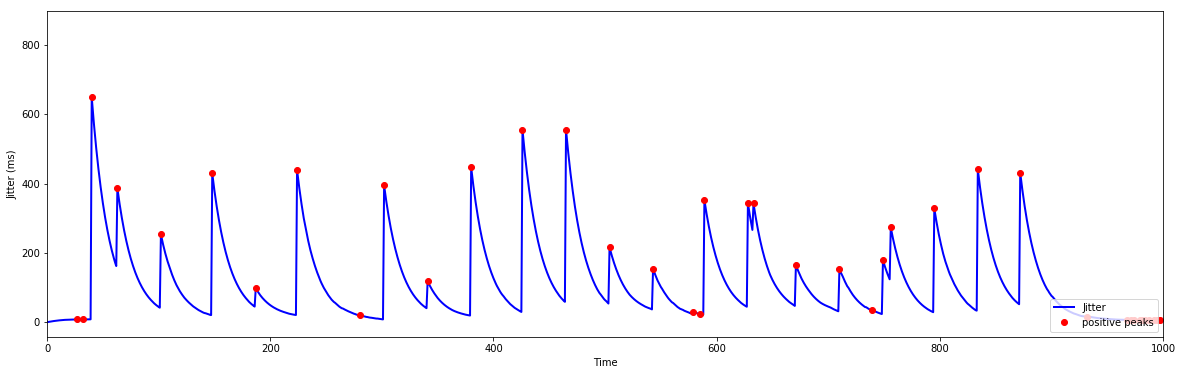

In [56]:
plt.plot(df2.Time, df2.Jitter, 'b-', linewidth = 2)

plt.plot(df2.Time[peaks_], df2.Jitter[peaks_], 'ro', label = 'positive peaks')

plt.xlabel('Time')
plt.ylabel('Jitter (ms)')
plt.xlim((0, 1000))
plt.legend(loc = 4)
plt.show()

In [65]:
peaks_[2:6]

array([ 39,  62, 101, 147], dtype=int64)

In [68]:
#With this, we can calculate the period of the signal by taking the diff of the peak indexes
np.diff(peaks_)[2:10]

array([23, 39, 46, 39, 37, 56, 22, 39], dtype=int64)

In [80]:
from scipy.optimize import curve_fit

In [12]:
x = df2.Time.values
y = df2.Jitter.values

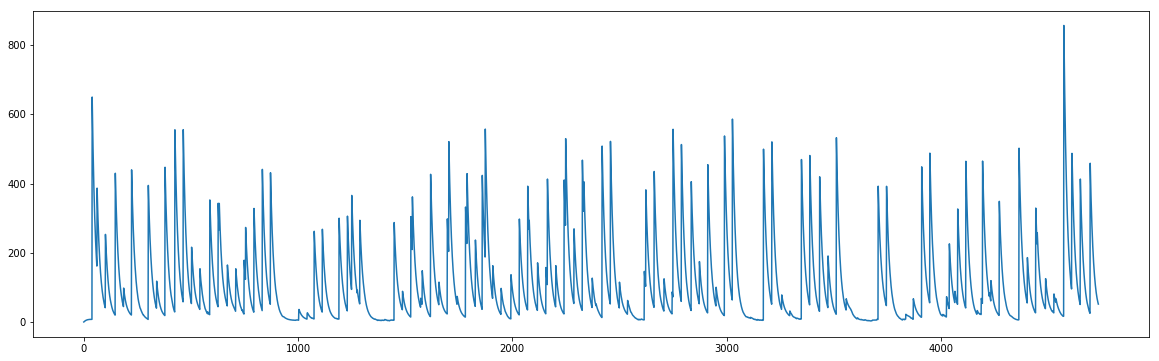

In [13]:
plt.plot(x,y)

In [14]:
from scipy.interpolate import *

In [100]:
p3 = np.polyfit(x,y,10)

In [101]:
print(p3)

[ 3.20521105e-30 -7.27688302e-26  6.85933637e-22 -3.50841283e-18
  1.06234324e-14 -1.93750491e-11  2.04789051e-08 -1.09722625e-05
  1.69832727e-03  4.84048197e-01  4.14044400e+01]


(0, 1000)

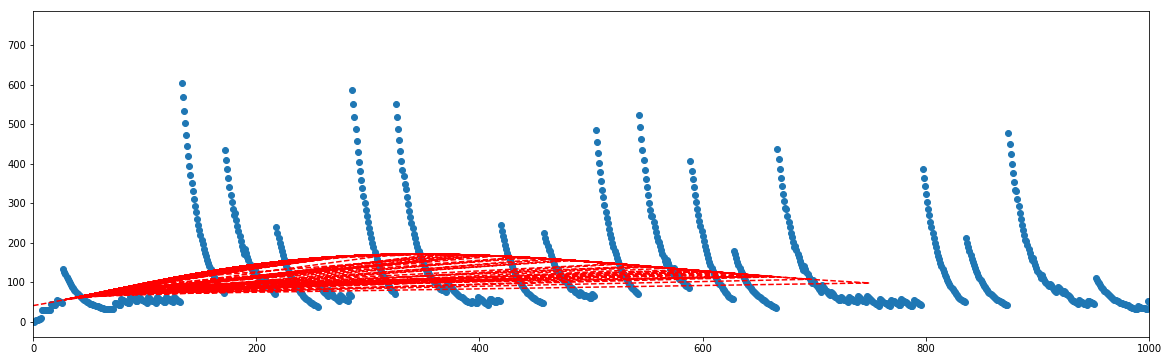

In [125]:
plt.plot(x,y,'o')
plt.plot(y,np.polyval(p3,y),'r--')
plt.xlim(0,1000)

In [118]:
mymodel = np.poly1d(np.polyfit(x, y, 20))

C:\Users\obinna.izima\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: RankWarning: Polyfit may be poorly conditioned
  """Entry point for launching an IPython kernel.


In [119]:
mline = np.linspace(1,1000, 2000)

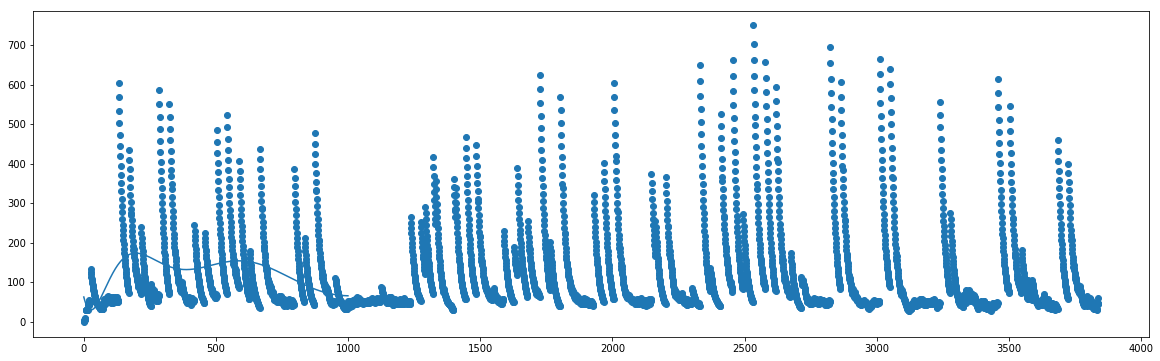

In [120]:
plt.scatter(x,y)
plt.plot(mline, mymodel(mline))
#plt.xlim(0,200)

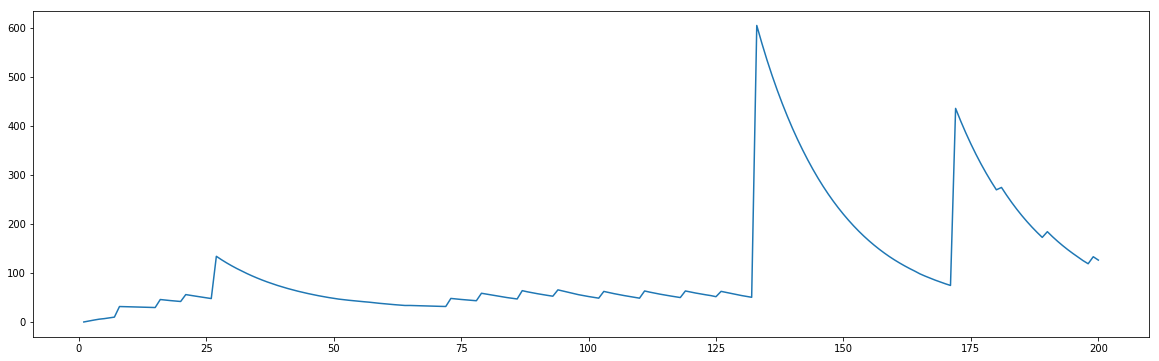

In [137]:
x1 = x[:200]
y1 = y[:200]
plt.plot(x1,y1)

C:\Users\obinna.izima\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: RankWarning: Polyfit may be poorly conditioned
  """Entry point for launching an IPython kernel.


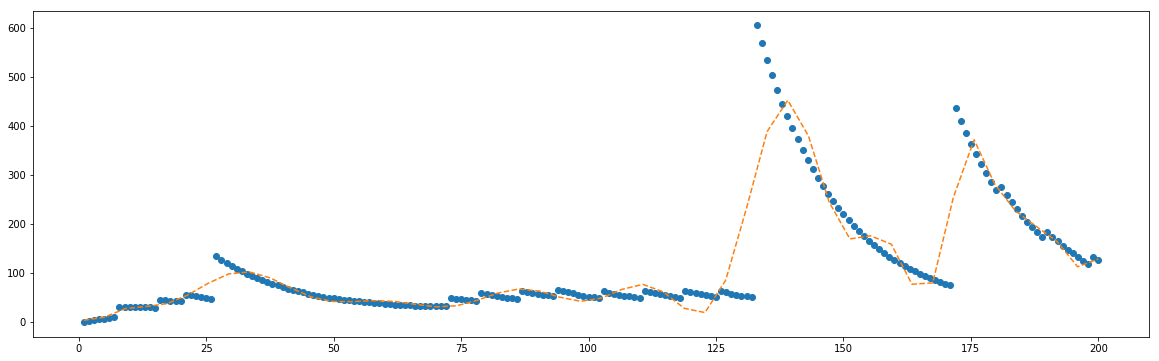

In [160]:
c = np.polyfit(x1,y1,101)
x1fit = np.linspace(x1.min(), x1.max())

y1fit = np.polyval(c,x1fit)
plt.plot(x1,y1,'o', x1fit,y1fit,'--');

In [136]:
import imageio as img

C:\Users\obinna.izima\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\optimize\minpack.py:787: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


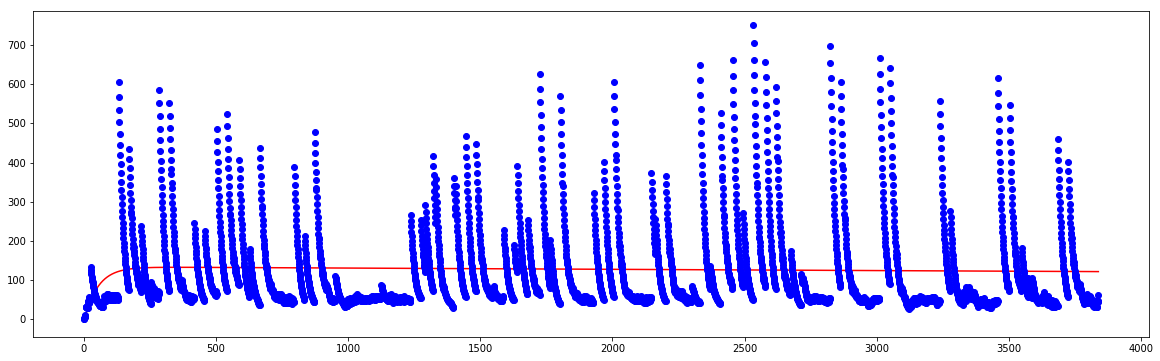

In [76]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec  # for unequal plot boxes
import scipy.optimize
import pandas as pd

def func(y, a, a1, a2, b, b1, b2, c1, c2):
    return a * np.exp(-b * x) + a1 * np.exp(-(x - b1)/c1)**2 + a2 * np.exp(-(x - b2)/c2)**2

df = pd.read_csv('h.265+mp3.csv')
x = df.Time.values
y = df.Jitter.values
a, a1, a2, b, b1, b2, c1, c2 = 1, 2, 3, 14, 18, 20, 23, 31

# fit data using SciPy's Levenberg-Marquart method
nlfit, nlpcov = scipy.optimize.curve_fit(func,
                x, y, p0=[a, a1, a2, b, b1, b2, c1, c2])

a_, a1_, a2_, b_, b1_, b2_, c1_, c2_ = nlfit

plt.plot(x, func(y, a_, a1_, a2_, b_, b1_, b2_, c1_, c2_), 'r-', label='fit')
plt.plot(x, y, 'bo')

In [42]:
len(nlfit)

8

In [43]:
yopt = func(x, a_, a1_, a2_, b_, b1_, b2_, c1_, c2_ )

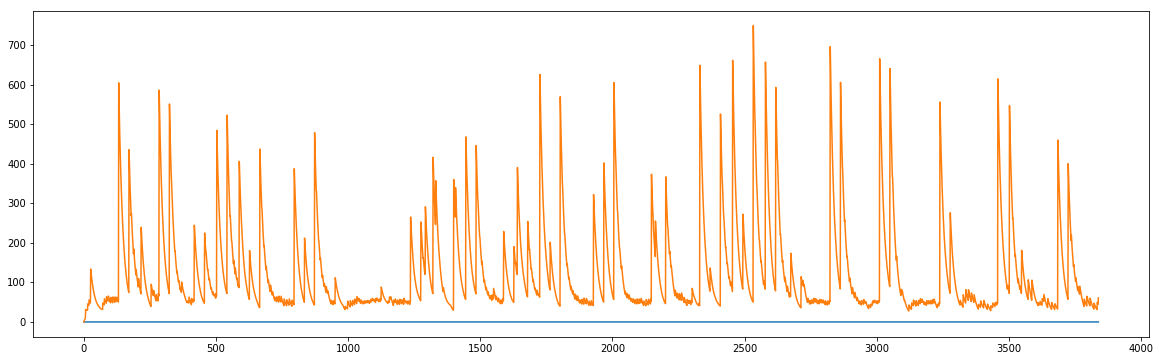

In [45]:
plt.plot(x, yopt)
plt.plot(x,y)

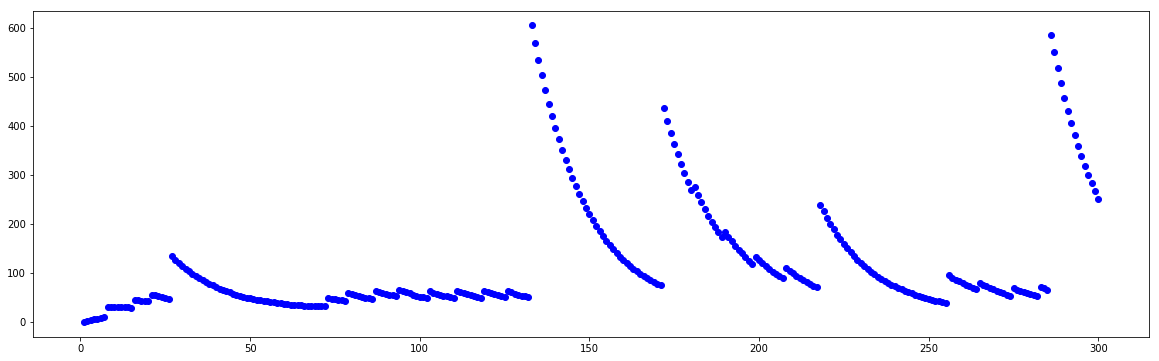

In [71]:
plt.plot(x[:300],y[:300], 'bo')

In [69]:
theta = 0.4
t = [1, 0, 1]
for i in t:
    S = 0 if t[i]<theta else 0.4
    print(S)

0
0.4
0


In [77]:
f = y

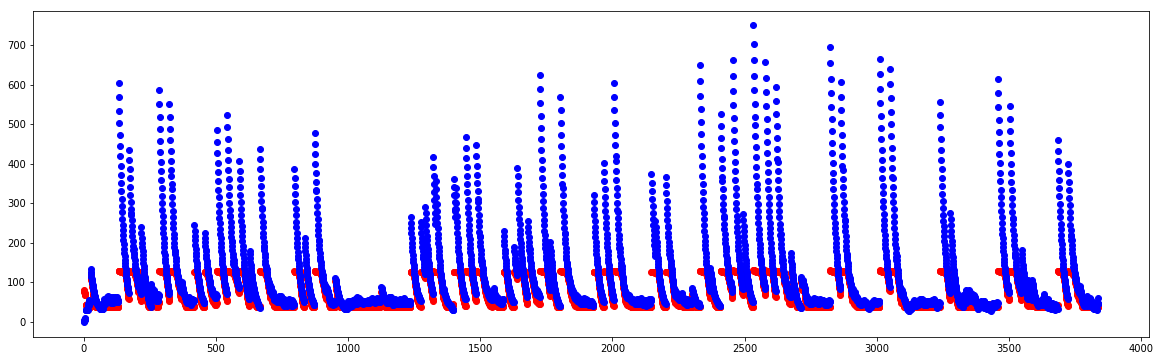

In [187]:
def GaussPolyBase(f, a, b, c, P, fp, fw):
    return a + b*f + c*f*f + P*np.exp(-0.5*((f-fp)/fw)**2)


# initial guesses for fitting parameters
a0, b0, c0 = 23., 1., 1.
P0, fp0, fw0 = 500., 14., 23.


#a0, b0, c0 = 60., -3., 0.
#P0, fp0, fw0 = 80., 11., 2.

# fit data using SciPy's Levenberg-Marquart method
c, cov = scipy.optimize.curve_fit(GaussPolyBase,
                x, f, p0=[a0, b0, c0, P0, fp0, fw0])

# unpack fitting parameters
a, b, c, P, fp, fw = c


plt.plot(x, GaussPolyBase(f, a, b, c, P, fp, fw), 'ro', label='fit')
plt.plot(x, f, 'bo')

(0, 300)

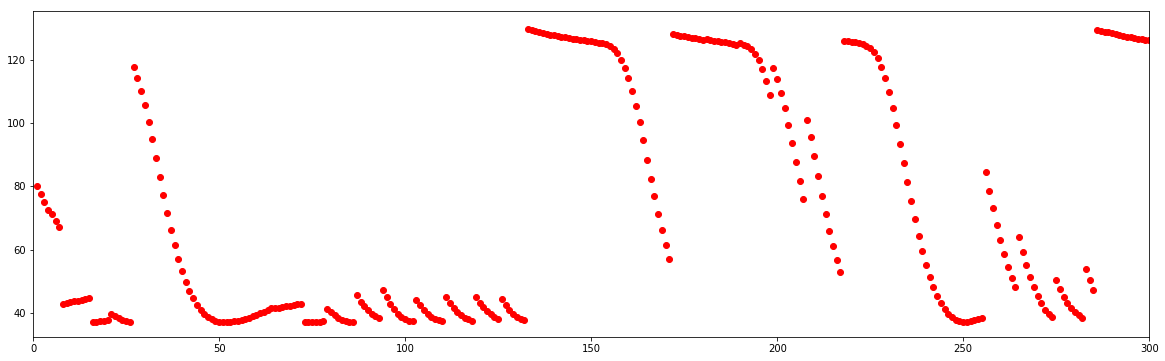

In [188]:
plt.plot(x, GaussPolyBase(f, a, b, c, P, fp, fw), 'ro')
plt.xlim(0,300)

(0, 300)

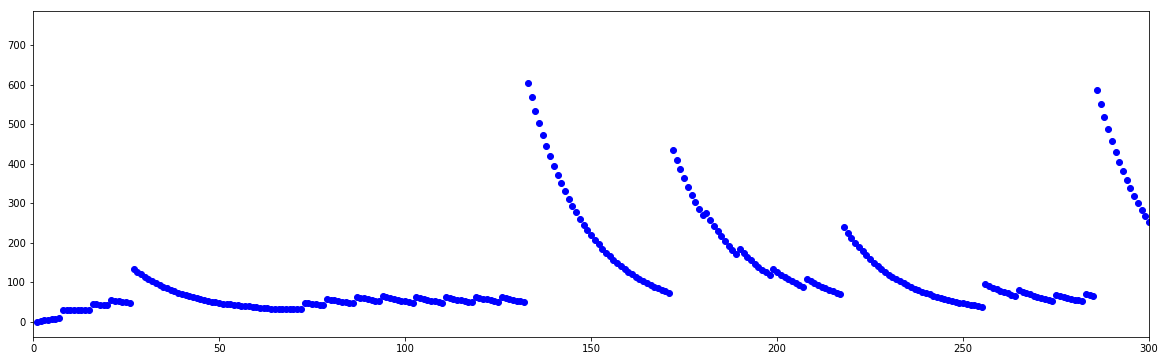

In [99]:
plt.plot(x, f, 'bo')
plt.xlim(0,300)

In [ ]:
def _2exponential(x, a, k1, b, k2, c):
    return a*np.exp(x*k1) + b*np.exp(x*k2) + c

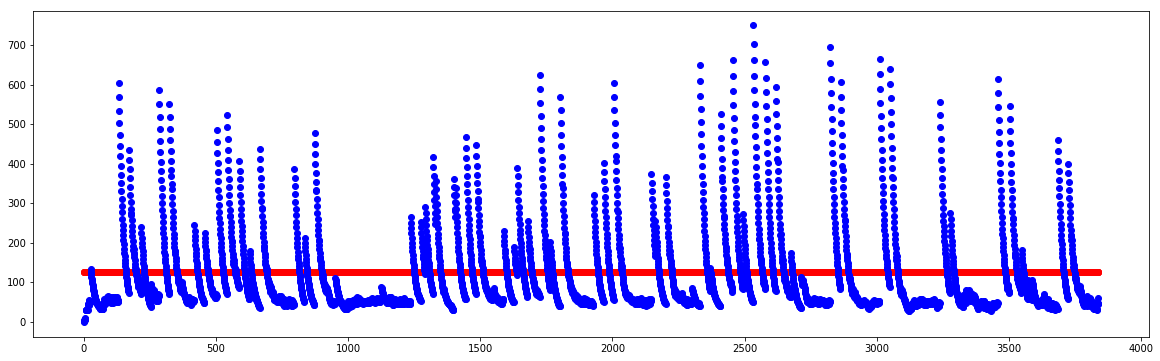

In [170]:
def fp(f, c, k, p):
    return c * (np.exp(-(f/k) + p))

# initial guesses for fitting parameters
c, k, p = 1, 1, 23

# fit data using SciPy's Levenberg-Marquart method
c, cov = scipy.optimize.curve_fit(fp,
                x, f, p0=[c, k, p])

# unpack fitting parameters
c0, k0, p0 = c

plt.plot(x, fp(f, c0, k0, p0), 'ro', label='fit')
plt.plot(x, f, 'bo')

C:\Users\obinna.izima\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in multiply
  
C:\Users\obinna.izima\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in add
  
C:\Users\obinna.izima\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\optimize\minpack.py:787: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


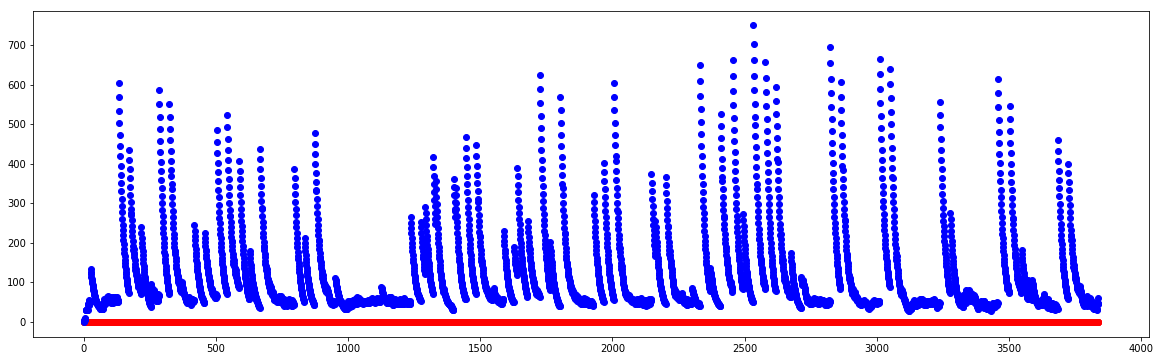

In [193]:
def f1(x, a, b, m, n):
    return (a * np.exp(-m*x)) + (b * np.exp(-n*x))

# initial guesses for fitting parameters
a, b, m, n = 1, 1, 1, 1

# fit data using SciPy's Levenberg-Marquart method
c, cov = scipy.optimize.curve_fit(f1,
                x, f, p0=[a, b, m, n])

# unpack fitting parameters
a0, b0, m0, n0 = c

plt.plot(x, f1(x, a0, b0, m0, n0), 'ro', label='fit')
plt.plot(x, f, 'bo')

In [183]:
y_log = np.log(f)

C:\Users\obinna.izima\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


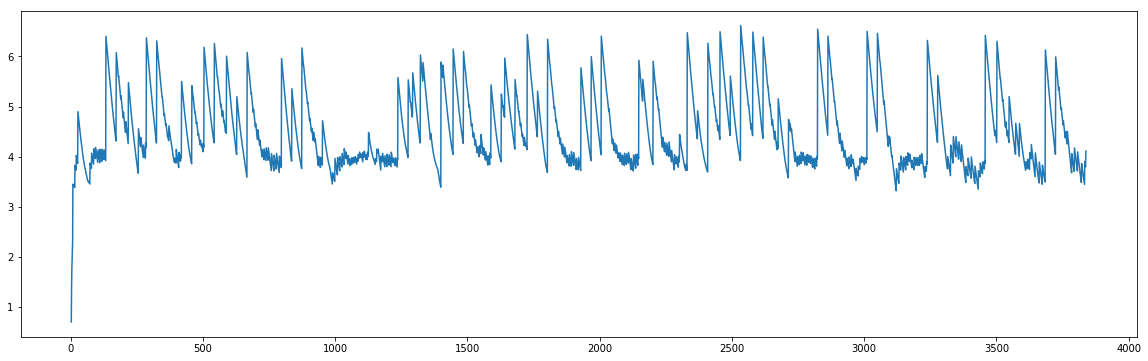

In [186]:
plt.plot(x,y_log)

In [194]:
tx = x

(0, 1000)

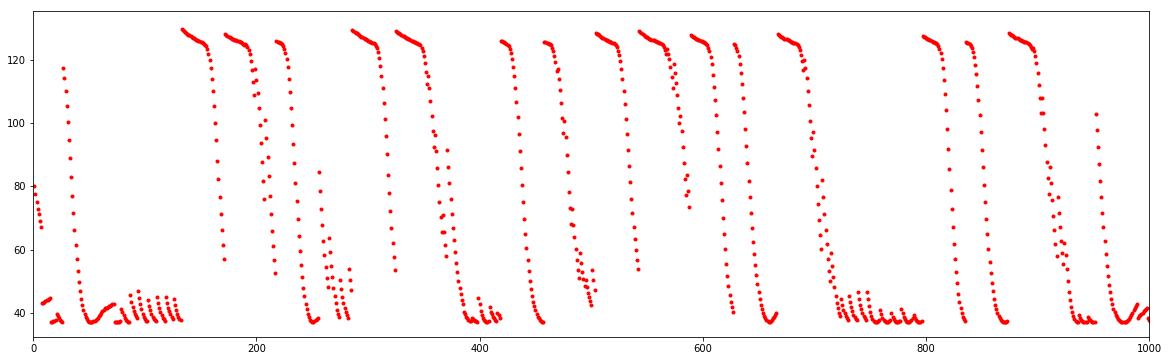

In [364]:
def f2(f, a, b, c, P, fp, fw):
    return a + b*f + c*f*f + P*np.exp(-0.5*((f-fp)/fw)**2)


# initial guesses for fitting parameters
a0, b0, c0 = -80., 0.08, 0.18
P0, fp0, fw0 = 15., 22., 2.

'''
Realized an R-square of 33.3% with these parameters

a0, b0, c0 = 3., 7., 5.
P0, fp0, fw0 = 10, 23., 22.
'''

#a0, b0, c0 = 60., -3., 0.
#P0, fp0, fw0 = 80., 11., 2.

# fit data using SciPy's Levenberg-Marquart method
c, cov = scipy.optimize.curve_fit(f2,
                x, f, p0=[a0, b0, c0, P0, fp0, fw0])

# unpack fitting parameters
a, b, c, P, fp, fw = c


plt.plot(x, f2(f, a, b, c, P, fp, fw), 'r.', label='fit')
plt.xlim(0,1000)
#plt.plot(x, y, 'bo')

In [365]:
from sklearn.metrics import r2_score
print('R^2: ', r2_score(y, f2(y, a, b, c, P, fp, fw))*100)

R^2:  21.76784439294409


In [355]:
params = [a, b, c, P, fp, fw]
for i in params:
    print (i)

-59.06714500462501
0.17379805022763403
-3.605435769124149e-05
170.1709358877154
281.4506703384164
314.158062328605


In [301]:
def expo(x):
    return 0.5**x

In [302]:
expo(6)

0.015625

In [217]:
f_fit = np.linspace(x.min(), x.max(), 2000)

In [218]:
s_fit = f2(f_fit, a, b, c, P, fp, fw)

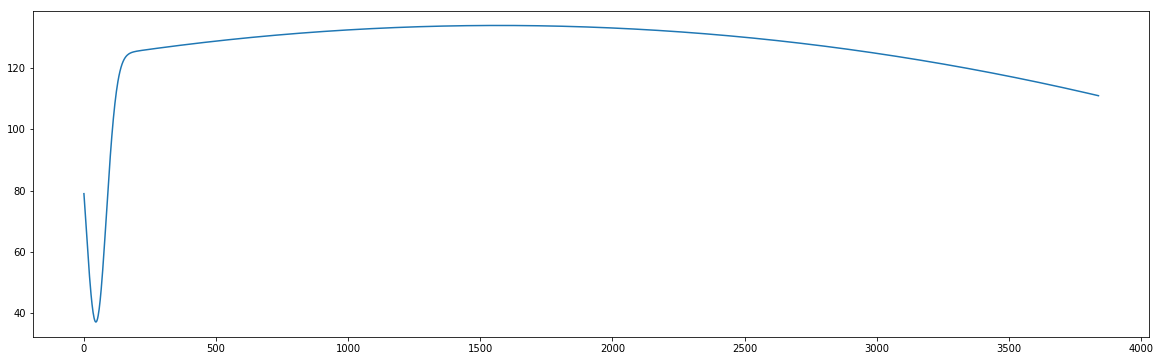

In [219]:
plt.plot(f_fit,s_fit)

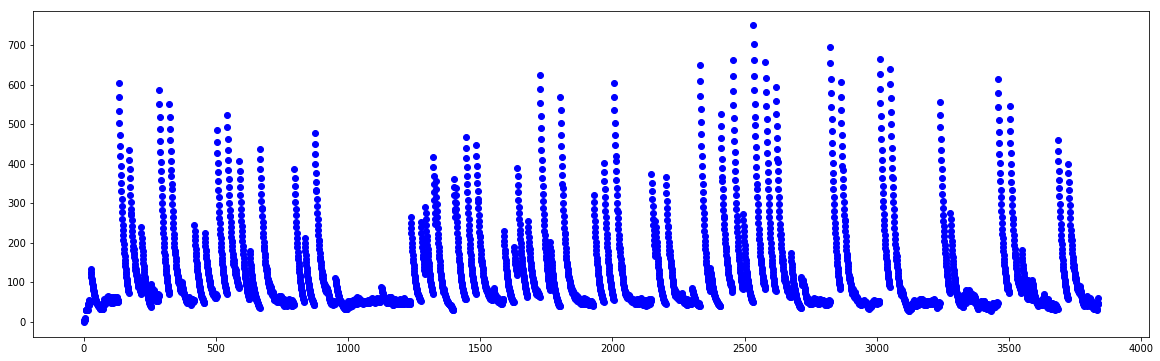

In [312]:
plt.plot(x, y, 'bo')
